**Loading Libraries and Data**

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('drug_sample.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


**Separate Features and Target Labels**

In [4]:
Features = df.iloc[:, 0:5]
Features

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [5]:
Target = df.iloc[:, -1]
Target

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

**Identify Categorical Variable**

In [6]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')


In [7]:
CategoricalFeatures = df.iloc[:, [1,2,3,5]]
CategoricalFeatures

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,drugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,drugY
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


**Bar Plot for Drug type Distributions**

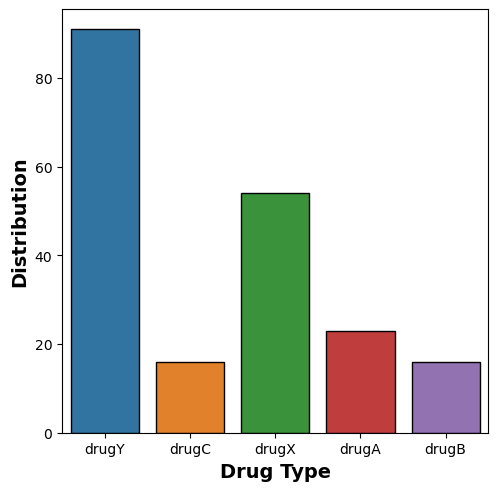

In [8]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='Drug', data=df, edgecolor='black')

plt.xlabel('Drug Type', fontsize=14, fontweight='bold')
plt.ylabel('Distribution', fontsize=14, fontweight='bold')

plt.savefig('Drug_Type_Distribution.pdf')

**Label encoding for Target**

In [11]:
LE = LabelEncoder()
LE.fit(Target)
Target2 = LE.transform(Target)
print(Target2)

[4 2 2 3 4 3 4 2 4 4 2 4 4 4 3 4 3 0 2 4 4 4 4 4 4 4 4 3 4 4 3 1 3 4 3 3 0
 3 3 3 4 1 4 3 3 3 0 2 4 4 4 3 4 4 1 2 1 4 3 4 4 0 4 3 1 4 0 3 4 4 1 4 3 4
 4 4 0 4 0 3 1 3 2 0 2 1 3 4 4 4 4 4 4 4 4 3 4 4 4 4 0 0 2 3 4 3 3 4 1 4 0
 3 3 3 3 4 3 3 0 4 4 4 4 4 1 4 4 3 4 3 4 4 3 4 4 3 1 0 1 3 0 4 1 4 0 3 3 0
 3 2 0 1 3 3 4 2 0 4 2 3 3 1 3 4 4 4 4 3 4 0 3 3 4 4 0 4 0 4 4 4 4 3 3 4 4
 4 1 0 4 4 4 0 4 2 4 2 2 3 3 3]


**Label encoding for Features**

In [14]:
OHE = OneHotEncoder(handle_unknown='ignore')
OHE.fit(CategoricalFeatures)
CategoricalFeatures2 = OHE.transform(CategoricalFeatures)
print(CategoricalFeatures2)

  (0, 0)	1.0
  (0, 2)	1.0
  (0, 5)	1.0
  (0, 11)	1.0
  (1, 1)	1.0
  (1, 3)	1.0
  (1, 5)	1.0
  (1, 9)	1.0
  (2, 1)	1.0
  (2, 3)	1.0
  (2, 5)	1.0
  (2, 9)	1.0
  (3, 0)	1.0
  (3, 4)	1.0
  (3, 5)	1.0
  (3, 10)	1.0
  (4, 0)	1.0
  (4, 3)	1.0
  (4, 5)	1.0
  (4, 11)	1.0
  (5, 0)	1.0
  (5, 4)	1.0
  (5, 5)	1.0
  (5, 10)	1.0
  (6, 0)	1.0
  :	:
  (193, 9)	1.0
  (194, 0)	1.0
  (194, 2)	1.0
  (194, 5)	1.0
  (194, 11)	1.0
  (195, 0)	1.0
  (195, 3)	1.0
  (195, 5)	1.0
  (195, 9)	1.0
  (196, 1)	1.0
  (196, 3)	1.0
  (196, 5)	1.0
  (196, 9)	1.0
  (197, 1)	1.0
  (197, 4)	1.0
  (197, 5)	1.0
  (197, 10)	1.0
  (198, 1)	1.0
  (198, 4)	1.0
  (198, 6)	1.0
  (198, 10)	1.0
  (199, 0)	1.0
  (199, 3)	1.0
  (199, 6)	1.0
  (199, 10)	1.0


**Splitting Dataset: Train-test split**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(CategoricalFeatures2, 
                                                    Target2, 
                                                    test_size=0.30,
                                                    stratify=Target2)

**Use Hyperparameter Tuning and make Logistic Regression Model**

In [15]:
# Define the model
model = LogisticRegression(max_iter=1000)

# Define the parameter grid
grid = {"C":np.logspace(-3,3,7), "penalty":["l2"]}

# Set up Grid Search
grid_search = GridSearchCV(model, grid, cv=10, scoring='accuracy')

# Fit the Grid Search
grid_search.fit(X_train,y_train)

print("best parameters: ", grid_search.best_params_)

best parameters:  {'C': 1.0, 'penalty': 'l2'}


In [26]:
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

**Evaluate Model Accuracy**

In [27]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


In [28]:
accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 1.0


**Confusion Matrix**

In [30]:
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix_Test:")
print(cm)

Confusion Matrix_Test:
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 27]]


In [31]:
cm = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix_Train:")
print(cm)

Confusion Matrix_Train:
[[16  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0 38  0]
 [ 0  0  0  0 64]]
